In [ ]:
#Impor Library dan Matriks
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve,classification_report
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Koneksi ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Membaca Dataset
df = pd.read_csv('/content/drive/My Drive/Pemb_Mesin/Tugas_Akhir/BankChurners.csv')

## Pemilihan Kolom yang akan dianalisis

In [ ]:
cols_to_use = ["Attrition_Flag","Customer_Age","Gender","Dependent_count","Education_Level","Marital_Status","Income_Category","Card_Category","Credit_Limit"]

In [ ]:
df = df[cols_to_use]

# Analisis Data Eksplorasi

In [ ]:
#Melihat 5 baris pertama dari kumpulan data
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit
0,0,45,M,3,High School,Married,$60K - $80K,Blue,12691.0
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,8256.0
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,3418.0
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,3313.0
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,4716.0


In [ ]:
#Memeriksa bentuk (ukuran) dari data
df.shape

(10127, 9)

In [ ]:
#Mempelajari dtypes kolom dan berapa banyak nilai bukan nol yang ada di kolom tersebut
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Attrition_Flag   10127 non-null  int64  
 1   Customer_Age     10127 non-null  int64  
 2   Gender           10127 non-null  object 
 3   Dependent_count  10127 non-null  int64  
 4   Education_Level  10127 non-null  object 
 5   Marital_Status   10127 non-null  object 
 6   Income_Category  10127 non-null  object 
 7   Card_Category    10127 non-null  object 
 8   Credit_Limit     10127 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 712.2+ KB


In [ ]:
#Mendapatkan ringkasan statistik kumpulan data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Attrition_Flag,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
Customer_Age,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
Dependent_count,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.0,4549.0,11067.5,34516.0


In [ ]:
#Memeriksa nilai yang hilang
df.isna().sum()

Attrition_Flag     0
Customer_Age       0
Gender             0
Dependent_count    0
Education_Level    0
Marital_Status     0
Income_Category    0
Card_Category      0
Credit_Limit       0
dtype: int64

In [ ]:
#Memeriksa nilai duplikat
df.duplicated().sum()

30

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.Attrition_Flag.value_counts()

0    8472
1    1625
Name: Attrition_Flag, dtype: int64

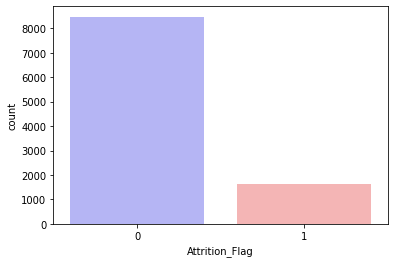

In [ ]:
sns.countplot(x="Attrition_Flag", data=df, palette="bwr")
plt.show()

In [ ]:
print ('Total Existing Customer : {} '.format(df.Attrition_Flag.value_counts()[0]))
print ('Total Attrited Customer : {} '.format(df.Attrition_Flag.value_counts()[1]))

Total Existing Customer : 8472 
Total Attrited Customer : 1625 


In [ ]:
countExist = len(df[df.Attrition_Flag == 0])
countAttrited = len(df[df.Attrition_Flag == 1])
print("Percentage of Existing Customer: {:.2f}%".format((countExist / (len(df.Attrition_Flag))*100)))
print("Percentage of Attrited Customer: {:.2f}%".format((countAttrited / (len(df.Attrition_Flag))*100)))

Percentage of Existing Customer: 83.91%
Percentage of Attrited Customer: 16.09%


In [ ]:
df.groupby('Attrition_Flag').mean()

,Customer_Age,Dependent_count,Credit_Limit
Attrition_Flag,,,
0,46.257200,2.334986,8711.922746
1,46.663385,2.401231,8144.282831


# Membagi Data menjadi Data Train dan Data Test

In [ ]:
y = df["Attrition_Flag"]
X = df.drop("Attrition_Flag", axis =1)
X = pd.get_dummies(X, columns=["Education_Level","Marital_Status","Income_Category","Card_Category","Gender"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,Customer_Age,Dependent_count,Credit_Limit,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,...,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Gender_F,Gender_M
0,45,3,12691.0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,49,5,8256.0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,51,3,3418.0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,40,4,3313.0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,40,3,4716.0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8077, 26), (2020, 26), (8077,), (2020,))

# Standarisasi Data


In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
label = LabelEncoder()

In [ ]:
y_train = label.fit_transform(y_train)
y_test = label.fit_transform(y_test)

# Naive Bayes Classifer

In [ ]:
gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gnb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
print('Training set score: {:.2f}%'.format(gnb.score(X_train, y_train)*100))

print('Test set score: {:.2f}%'.format(gnb.score(X_test, y_test)*100))

Training set score: 84.04%
Test set score: 83.37%


In [ ]:
y_test.value_counts()

0    1684
1     336
Name: Attrition_Flag, dtype: int64

In [ ]:
null_accuracy = (1684/(1684+336))

print('Null accuracy score: {:.2f}%'. format((null_accuracy)*100))

Null accuracy score: 83.37%


In [ ]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1684    0]
 [ 336    0]]

True Positives(TP) =  1684

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  336


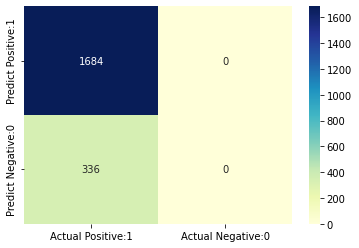

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1684
           1       0.00      0.00      0.00       336

    accuracy                           0.83      2020
   macro avg       0.42      0.50      0.45      2020
weighted avg       0.69      0.83      0.76      2020



In [ ]:
y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.8022862 , 0.1977138 ],
       [0.79469613, 0.20530387],
       [0.85818398, 0.14181602],
       [0.91612229, 0.08387771],
       [0.91972077, 0.08027923],
       [0.83757746, 0.16242254],
       [0.90588759, 0.09411241],
       [0.87426898, 0.12573102],
       [0.81468776, 0.18531224],
       [0.78181578, 0.21818422]])

In [ ]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Existing Customer', 'Attrited Customer'])

y_pred_prob_df

,Existing Customer,Attrited Customer
0,0.802286,0.197714
1,0.794696,0.205304
2,0.858184,0.141816
3,0.916122,0.083878
4,0.919721,0.080279
5,0.837577,0.162423
6,0.905888,0.094112
7,0.874269,0.125731
8,0.814688,0.185312
9,0.781816,0.218184


In [ ]:
y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

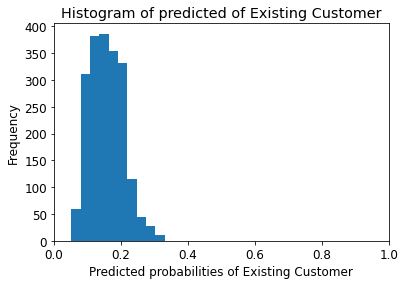

In [ ]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted of Existing Customer')


# set the x-axis limit
plt.xlim(0,1)

# set the title
plt.xlabel('Predicted probabilities of Existing Customer')
plt.ylabel('Frequency')